In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train.set_index('PassengerId', inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Separo por comodidad visual los nombres

In [29]:
l = train.Name.str.split(',', expand = True)
train.Name = l[0]

Compruebo el tipo de valor y luego lo transformo a binario

In [30]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
mapeo = {'male': 0, 'female': 1}
train.Sex = train.Sex.map(mapeo)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


El atributo Age cuenta con varios valores nulos, lo primero que pense fue intercambiar null por la media/mediana, pero viendo un histograma comprobe que me modificaba la distribucion, por lo que opte en elegir datos random.

In [32]:
train.Age.mean(), train.Age.median()

(29.69911764705882, 28.0)

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

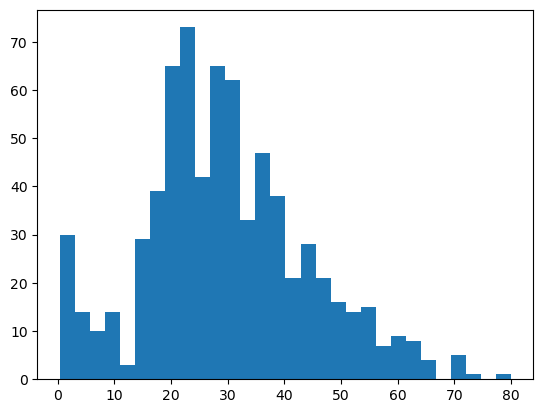

In [8]:
plt.hist(train.Age, bins = 30)

In [9]:
train['Age_imp'] = train['Age'].fillna(pd.Series(np.random.choice(train['Age'].dropna(), size=len(train['Age'].isna()))))

# Reemplazar la columna original 'Age' con la columna 'Age_imp'
train['Age'] = train['Age_imp']

(array([33., 15., 11., 14.,  4., 36., 50., 81., 95., 51., 81., 73., 42.,
        57., 54., 29., 34., 25., 17., 18., 20.,  8., 14., 13.,  6.,  0.,
         7.,  2.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

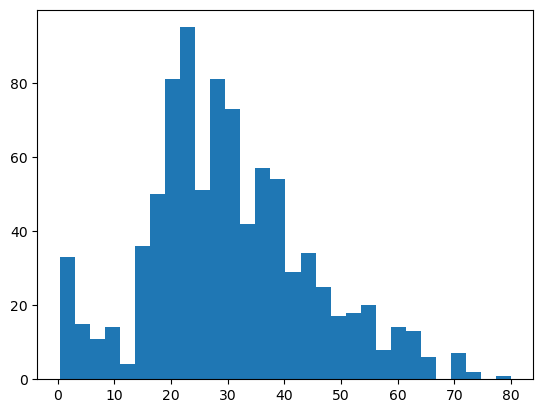

In [10]:
plt.hist(train.Age, bins = 30)

In [11]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: >

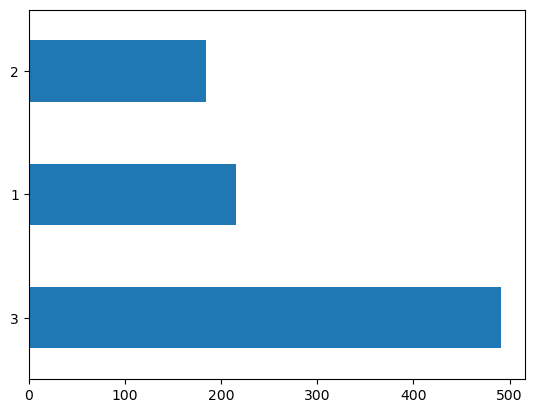

In [12]:
train.Pclass.value_counts().plot(kind='barh')

In [13]:
def prop(clase, total):
    x = len(clase) / len(total)
    return round(x * 100, 2)

Pense en profundizar sobre las proporciones de sobrevivientes en funcion de la clase social, descubi que la clase con mas sobrevivientes fue la clase alta, seguido de la baja y por ultimo la clase media.  ¿Posibles predictores?

In [14]:
alta_s = train[(train.Pclass == 1) & (train.Survived == 1)]
media_s = train[(train.Pclass == 2) & (train.Survived == 1)]
baja_s = train[(train.Pclass == 3) & (train.Survived == 1)]

print(f"De clase alta sobrevivieron: {len(alta_s)}, media: {len(media_s)}, y baja: {len(baja_s)}")
print(f"Proporcionalmenre significa:")
print(prop(alta_s, train))
print(prop(media_s, train))
print(prop(baja_s, train))

De clase alta sobrevivieron: 136, media: 87, y baja: 119
Proporcionalmenre significa:
15.26
9.76
13.36


In [15]:
print(f"{(len(train[train.SibSp == 0]) / len(train)) * 100:.2f}% no cuentan con hnos/parejas.")

68.24% no cuentan con hnos/parejas.


<AxesSubplot: >

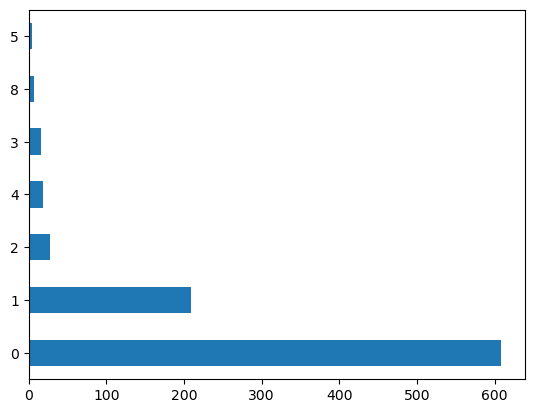

In [16]:
train.SibSp.value_counts().plot(kind='barh')

In [17]:
print(f"{(len(train[train.Parch == 0]) / len(train)) * 100:.2f}% no cuentan con hijos/flia.")

76.09% no cuentan con hijos/flia.


<AxesSubplot: xlabel='Fare', ylabel='Density'>

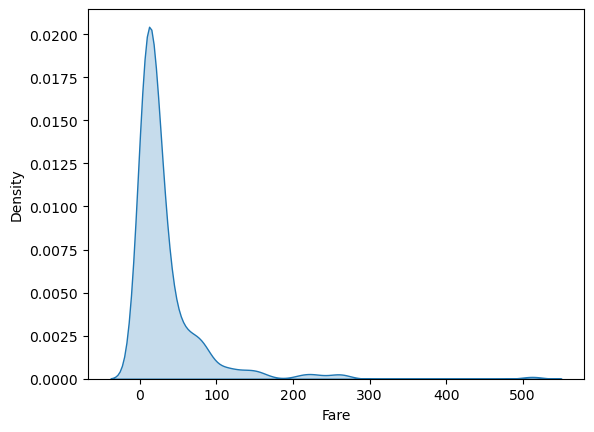

In [18]:
sns.kdeplot(train.Fare, fill = True)

In [19]:
train[train.Fare == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp
PassengerId,,,,,,,,,,,,
180,0,3,Leonard,male,36.0,0,0,LINE,0.0,NaN,S,36.0
264,0,1,Harrison,male,40.0,0,0,112059,0.0,B94,S,40.0
272,1,3,Tornquist,male,25.0,0,0,LINE,0.0,NaN,S,25.0
278,0,2,Parkes,male,37.0,0,0,239853,0.0,NaN,S,37.0
303,0,3,Johnson,male,19.0,0,0,LINE,0.0,NaN,S,19.0
414,0,2,Cunningham,male,52.0,0,0,239853,0.0,NaN,S,52.0
467,0,2,Campbell,male,21.0,0,0,239853,0.0,NaN,S,21.0
482,0,2,Frost,male,34.0,0,0,239854,0.0,NaN,S,34.0
598,0,3,Johnson,male,49.0,0,0,LINE,0.0,NaN,S,49.0


In [20]:
train.Fare = train.Fare.replace(0, train.Fare.median())

<AxesSubplot: xlabel='Fare', ylabel='Density'>

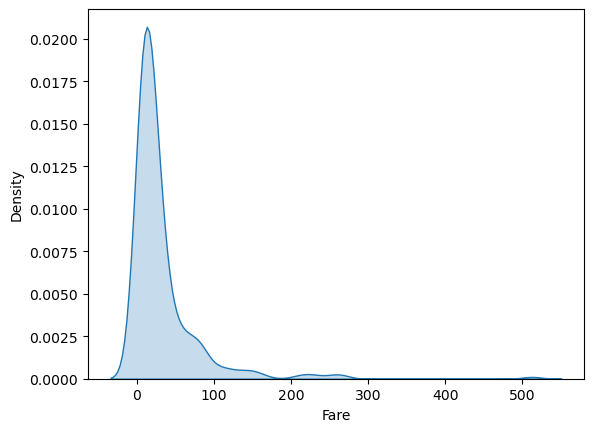

In [21]:
sns.kdeplot(train.Fare, fill = True)

In [22]:
train.drop(['Cabin', 'Age_imp', 'Ticket'], axis = 1, inplace = True)

In [23]:
mapeo = {'S': 0, 
         'C': 1, 
         'Q': 2
        }
train.Embarked = train.Embarked.map(mapeo)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 69.6+ KB


Por ultimo queria comprobar si existia alguna relacion entre Pclass(pasaje de clase(1,2,3 clase)) y el precio del pasaje(Fare), descubri que existe una correlacion negativa

In [25]:
from scipy.stats import spearmanr

corre = train.filter(['Pclass', 'Fare'], axis = 1)
corr = spearmanr(train['Pclass'], train['Fare'])
print('Correlación de Spearman:', corr[0])

Correlación de Spearman: -0.7177541610101845
